In [22]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

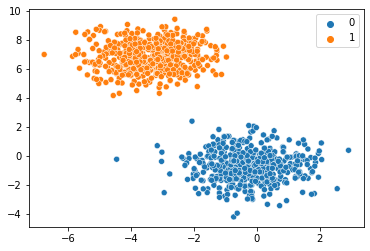

In [23]:
X, Y = make_blobs(n_samples=1000, n_features=3, centers=2)
X[:,0] = 1
sns.scatterplot(x=X[:,1], y=X[:,2], hue=Y)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=19)

In [25]:
x_train.shape

(700, 3)

In [26]:
x_test.shape

(300, 3)

## Cost function: Cross Entropy

In [27]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [28]:
def cross_entropy_loss(y, y_pred):
    loss = -np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return loss

In [29]:
def gradient1(x, y, y_pred):
    dw = np.dot(x.T, (y_pred-y))
    return dw

In [30]:
def logistic_regression_1(X, y, lr=0.001):
    m, n =  X.shape
    w = np.random.rand(n, 1)
    y = y.reshape(m, 1)
    losses = []
    pre_loss = cross_entropy_loss(y, sigmoid(np.dot(X, w)))
    cur_loss = 0
    epochs=0


    while abs(cur_loss - pre_loss) > 0.0001:
        y_pred = sigmoid(np.dot(X, w))
        dw = gradient1(X, y, y_pred)
        w -= lr*dw
        pre_loss = cur_loss
        cur_loss = cross_entropy_loss(y, sigmoid(np.dot(X, w)))
        losses.append(cur_loss)
        epochs+=1
        
    print("Number of epochs: ",epochs)
    return w, losses


In [31]:
def prediction(X, w):
    pred = sigmoid(np.dot(X, w))
    y_pred = []
    y_pred = [1 if i>0.5 else 0 for i in pred]
    return y_pred

In [32]:
def accuracy(y, y_pred):
    acc = np.sum(y == y_pred) / len(y)
    return acc*100

In [33]:
w, loss1 = logistic_regression_1(x_train, y_train)
y_pred1 = prediction(x_test, w)
print("Accuracy: ",accuracy(y_test, y_pred1))

Number of epochs:  4665
Accuracy:  100.0


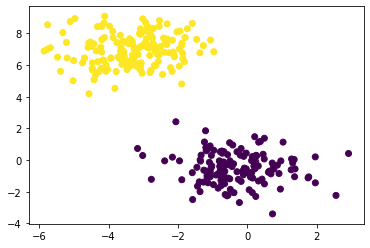

In [34]:
plt.scatter(x_test[:,1], x_test[:,2], c=y_test)
plt.show()

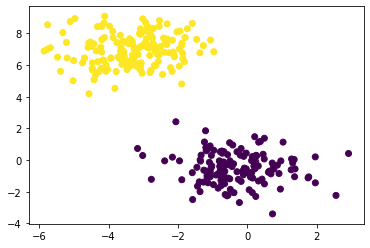

In [35]:
plt.scatter(x_test[:,1], x_test[:,2], c=y_pred1)
plt.show()

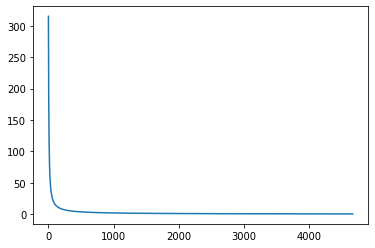

In [36]:
plt.plot(loss1)
plt.show()

## Cost function: LMS

In [37]:
def LMS(y, y_pred):
    loss = np.sum(np.square(y-y_pred))
    return loss

In [38]:
def gradient2(x, y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    dw = np.dot(x.T, y_pred - y)*np.dot(y_pred.T, 1-y_pred)

    return dw

In [39]:
def logistic_regression2(X, y, lr=0.0001):
    m, n =  X.shape
    w = np.random.rand(n, 1)
    y = y.reshape(m, 1)
    losses = []
    cur_loss = LMS(y, sigmoid(np.dot(X, w)))
    pre_loss = 0
    epochs = 0

    while abs(cur_loss - pre_loss) > 0.0001:
        y_pred = sigmoid(np.dot(X, w))
        dw = gradient2(X, y, y_pred)
        w -= lr*dw
        pre_loss = cur_loss
        cur_loss = LMS(y, sigmoid(np.dot(X, w)))
        losses.append(cur_loss)
        epochs+=1

    print(epochs)
    return w, losses


In [40]:
w, loss2 = logistic_regression2(x_train, y_train)
y_pred2 = prediction(x_test, w)
accuracy(y_test, y_pred2)

1442


100.0

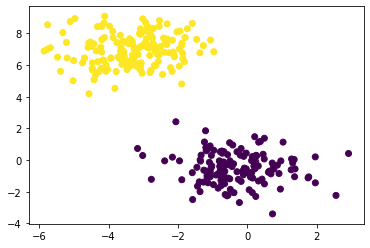

In [41]:
plt.scatter(x_test[:,1], x_test[:,2], c=y_pred2)
plt.show()

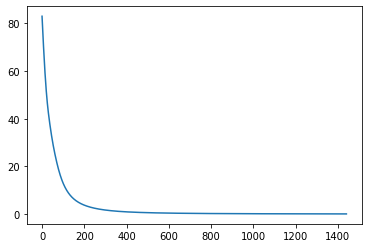

In [42]:
plt.plot(loss2)